# Mount Drive

In [23]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/'My Drive/Desktop/ML/ProjectsML/Sentiment_Analysis/'
%ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Desktop/ML/ProjectsML/Sentiment_Analysis_multilabel
data/         Pytorch_torchtext.ipynb       Sentiment_Preprocessing.ipynb
older_data/   Semantic_Training.ipynb       utils.py
__pycache__/  Semantic_Training_LSTM.ipynb


# Libraries

In [24]:
import pandas as pd
import numpy as np
import nltk
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from utils import CleanText, contractions
from collections import Counter, OrderedDict
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings("ignore")

# Read data

In [25]:
df = pd.read_csv("data/complete_train.csv")
print("Length : ", len(df))
df.head(5)

Length :  48795


,comment_text,identity_hate,negative,obscene
0,", 10 November 2007 (UTC)\nThanks v much for that. I was on my way to ANI with the evdence of his canvassing (, , , , , , , , , , ), so I'll add the sockpuppet to the list. I have taken this to ANI: see Ryoung122: more canvassing and a sockpuppet. (talk) • (contribs) 13:31",0,0,0
1,"|listas = Ermengol 03, Count Of Urgell",0,0,0
2,Mexico National football Team \nThanks I didnt know how to fix it,0,0,0
3,"I have to apologize to Mrs Shewell. I did not mean disrespect. I am very grateful for her time she gave to me the other day. I have found that there must be at least two entirely different physiologis producing timbre commonly called ¨falsetto¨ This explains much. My own falsetto (and Ian Gillan's too I believe) is the most powerful on the top, no sign of breath and my apple stays down regardless of pitch. Also the vibration I feel much higher in the throat. It denies a lot what many including Mrs Shewell say about falsetto",0,0,0
4,", 28 April 2007 (UTC)\nReport me and EVERY alias you think I'm sock puppeting. When that gets resolved, I expect an apology. I'll stop tossing bread under the bridge for you. 03:07",0,0,0


#### Basic info

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48795 entries, 0 to 48794
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment_text   48795 non-null  object
 1   identity_hate  48795 non-null  int64 
 2   negative       48795 non-null  int64 
 3   obscene        48795 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


# Clean data

#### Stopwords

In [27]:
nltk.download('stopwords')
stopwords = list(nltk.corpus.stopwords.words('english'))
stopwords.remove("no");stopwords.remove("nor");stopwords.remove("not")
print(sorted(stopwords))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'sa

#### Data before cleaning

In [28]:
df.head(5)

,comment_text,identity_hate,negative,obscene
0,", 10 November 2007 (UTC)\nThanks v much for that. I was on my way to ANI with the evdence of his canvassing (, , , , , , , , , , ), so I'll add the sockpuppet to the list. I have taken this to ANI: see Ryoung122: more canvassing and a sockpuppet. (talk) • (contribs) 13:31",0,0,0
1,"|listas = Ermengol 03, Count Of Urgell",0,0,0
2,Mexico National football Team \nThanks I didnt know how to fix it,0,0,0
3,"I have to apologize to Mrs Shewell. I did not mean disrespect. I am very grateful for her time she gave to me the other day. I have found that there must be at least two entirely different physiologis producing timbre commonly called ¨falsetto¨ This explains much. My own falsetto (and Ian Gillan's too I believe) is the most powerful on the top, no sign of breath and my apple stays down regardless of pitch. Also the vibration I feel much higher in the throat. It denies a lot what many including Mrs Shewell say about falsetto",0,0,0
4,", 28 April 2007 (UTC)\nReport me and EVERY alias you think I'm sock puppeting. When that gets resolved, I expect an apology. I'll stop tossing bread under the bridge for you. 03:07",0,0,0


#### Data after cleaning

In [29]:
clean = CleanText(stopwords)
df["comment_text"] = df.comment_text.apply(clean.clean_all)
df.drop(list(df.loc[df.comment_text == ''].index), axis=0, inplace=True)
df.head()

,comment_text,identity_hate,negative,obscene
0,november utc thanks v much way ani evdence canvassing add sockpuppet list taken ani see ryoung canvassing sockpuppet talk contribs,0,0,0
1,listas ermengol count urgell,0,0,0
2,mexico national football team thanks didnt know fix,0,0,0
3,apologize mrs shewell not mean disrespect grateful time gave day found must least two entirely different physiologis producing timbre commonly called falsetto explains much falsetto ian gillan s believe powerful top no sign breath apple stays regardless pitch also vibration feel much higher throat denies lot many including mrs shewell say falsetto,0,0,0
4,april utc report every alias think sock puppeting gets resolved expect apology stop tossing bread bridge,0,0,0


# Split data into train and validation

In [30]:
train_df, val_df = train_test_split(df, test_size=0.05, random_state=0)
print("Train length : {} | Val length : {}".format(len(train_df), len(val_df)))

Train length : 46341 | Val length : 2439


#### Train data

In [31]:
train_df.head(3)

,comment_text,identity_hate,negative,obscene
48010,updated shall give thanks cyclonebiskit,0,0,0
32838,tesla cult tesla cult stuff black magic not science stop absurdity,0,0,0
16348,black list thanks notice saw back seems little immature not mention needlessly antagonistic actually site twice involved early taken step back little concerned events last couple days work sooner later thanks,0,0,0


#### Validation data

In [32]:
val_df.head(3)

,comment_text,identity_hate,negative,obscene
27120,god stupidity incarnate fuck picture causing serious offense problem picture bahaullah looks like crook bahai organization not want picture float around not good advertisement cult sound extremely stupid,0,1,1
44943,ah another thing implement new template set even acronyms supported take look template flagicon want know make porting old standard new one trust found many articles used acronyms ciao,0,0,0
19729,lake ellsworth mentioned article links lake ellsworth antarctica obviously not right not find wikipedia reference lake ellsworth ok de linking,0,0,0


# More **identity_hate** data

In [33]:
more_df = pd.read_csv("data/more_data.csv")
print(len(more_df))
more_df.head(2)

1405


,comment_text,identity_hate,negative,obscene
0,"You are gay or antisemmitian? \n\nArchangel WHite Tiger\n\nMeow! Greetingshhh!\n\nUh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...\n\n1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!\n\n2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!\n\n3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write in my page! I don't wish to talk to you anymore!\n\nBeware of the Dark Side!",1,1,1
1,A pair of jew-hating weiner nazi schmucks.,1,1,1


In [34]:
more_df["comment_text"] = more_df.comment_text.apply(clean.clean_all)
more_df.drop(list(more_df.loc[more_df.comment_text == ''].index), axis=0, inplace=True)
more_df.head(2)

,comment_text,identity_hate,negative,obscene
0,gay antisemmitian archangel white tiger meow greetingshhh uh two ways erased comment ww holocaust brutally slaying jews not gays gypsys slavs anyone anti semitian shave head bald go skinhead meetings doubt words bible homosexuality deadly sin make pentagram tatoo forehead go satanistic masses gay pals first last warning fucking gay not appreciate nazi shwain would write page not wish talk anymore beware dark side,1,1,1
1,pair jew hating weiner nazi schmucks,1,1,1


In [35]:
train_df = train_df.append(more_df, ignore_index=True)
print(len(train_df))
train_df.head(2)

47746


,comment_text,identity_hate,negative,obscene
0,updated shall give thanks cyclonebiskit,0,0,0
1,tesla cult tesla cult stuff black magic not science stop absurdity,0,0,0


# Data Insights

## Number of comments per labels

In [36]:
def count_labels(df):

  counts_dict = {'labels': [], 'counts': []}
  for col in df.drop(["comment_text"], axis=1).columns:
    counts_dict['labels'].append(col)
    counts_dict['counts'].append(df[col].loc[df[col] == 1].count())

  temp_df = pd.DataFrame(counts_dict)
  temp_df['total'] = len(df)
  temp_df['percentage'] = (temp_df.counts / temp_df.total) * 100
  return temp_df

#### Train data

In [37]:
count_train_df = count_labels(train_df)
count_train_df

,labels,counts,total,percentage
0,identity_hate,2495,47746,5.225569
1,negative,8286,47746,17.354333
2,obscene,7680,47746,16.085117


Text(0.5, 0, 'labels')

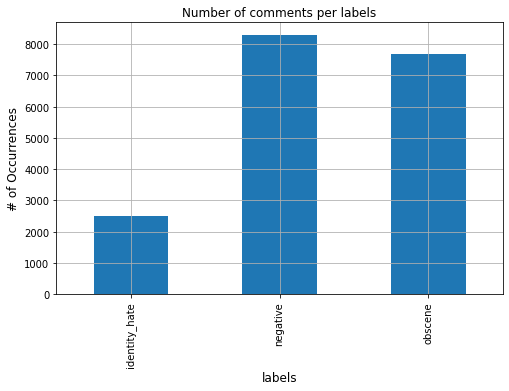

In [38]:
count_train_df.plot(x='labels', y='counts', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per labels")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('labels', fontsize=12)

#### Validation data

In [39]:
count_val_df = count_labels(val_df)
count_val_df

,labels,counts,total,percentage
0,identity_hate,54,2439,2.214022
1,negative,353,2439,14.473145
2,obscene,340,2439,13.940139


Text(0.5, 0, 'labels')

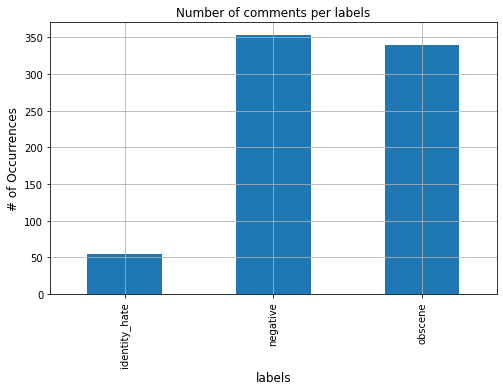

In [40]:
count_val_df.plot(x='labels', y='counts', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per labels")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('labels', fontsize=12)

## Length of sentences (word counts)

#### Train data

In [41]:
train_df.comment_text.apply(lambda x: len(x.split())).describe()

count    47746.000000
mean        34.570393
std         57.738416
min          1.000000
25%          8.000000
50%         17.000000
75%         37.000000
max       1250.000000
Name: comment_text, dtype: float64

#### Validation data

In [42]:
val_df.comment_text.apply(lambda x:len(x.split())).describe()

count    2439.000000
mean       36.119721
std        61.922406
min         1.000000
25%         8.000000
50%        18.000000
75%        37.000000
max      1235.000000
Name: comment_text, dtype: float64

#### Write to csv

In [43]:
train_df.to_csv("data/train.csv", index=False)
val_df.to_csv("data/val.csv", index=False)